In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.differentiate import derivative
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from scipy.interpolate import CubicSpline

In [2]:
#constant:
#mass of h bozon
m_zbozon = 91.1880 #GeV/c^2
unc_m_zbozon = 0.0020 #GeV/c^2

#mass of w bozon
m_hbozon = 80.3692 #GeV/c^2
unc_m_hbozon = 0.0133 #GeV/c^2

#mass of higgs bozon
m_higgsbozon = 125.20 #GeV/c^2
unc_m_higgsbozon = 0.11 #GeV/c^2

#mass of electron
m_e = 0.51099895000 #MeV/c^2
unc_m_e = 0.00000000015 #MeV/c^2

#mass of muon
m_muon = 105.6583755 #MeV/c^2
unc_m_muon = 0.0000023 #MeV/c^2

#mass of tau
m_tau = 1776.93 #MeV/c^2
unc_m_tau = 0.09 #MeV/c^2

# Part 1: The Invariant Mass Distribution

In [3]:
# question 1
atlas_data = np.genfromtxt("atlas_z_to_ll.csv",  delimiter = ',', skip_header = 1)

pt1 = atlas_data[:,0]
pt2 = atlas_data[:,1]
eta1 = atlas_data[:,2]
eta2 = atlas_data[:,3]
phi1 = atlas_data[:,4]
phi2 = atlas_data[:,5]
E1 = atlas_data[:,6]
E2 = atlas_data[:,7]

# question 2
px1 = pt1*np.cos(phi1)
px2 = pt2*np.cos(phi2)
px_tot = px1 + px2

py1 = pt1*np.sin(phi1)
py2 = pt2*np.sin(phi2)
py_tot = py1 + py2

pz1 = pt1*np.sinh(eta1)
pz2 = pt2*np.sinh(eta2)
pz_tot = pz1 + pz2

M = np.sqrt((E1+E2)**2-(px_tot**2+py_tot**2+pz_tot**2)) #GeV
print(M)

[92.1500371  89.28245012 88.2747245  ... 89.49674175 67.40937294
 90.84796693]


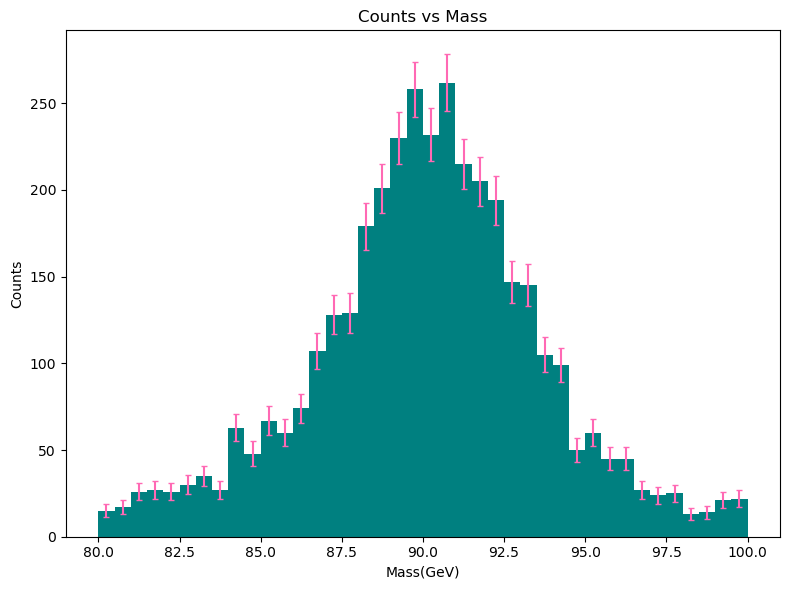

In [4]:
# question 3
bins = np.linspace(80, 100, 41)

fig, ax = plt.subplots(figsize = (8, 6))

new_bins = bins[:-1]
bin_center = (bins[1]-bins[0])/2

counts, bins, patches = ax.hist(M, bins = bins, color = 'teal');

sigma_counts = np.sqrt(counts)
plot_bins_center = new_bins+bin_center

ax.errorbar(plot_bins_center, counts, sigma_counts, fmt = ' ', capsize = 2.5, ecolor = 'hotpink')
ax.set_xlabel("Mass(GeV)")
ax.set_ylabel("Counts")
ax.set_title("Counts vs Mass")
fig.tight_layout()

# Part 2: Breit-Wigner Fit

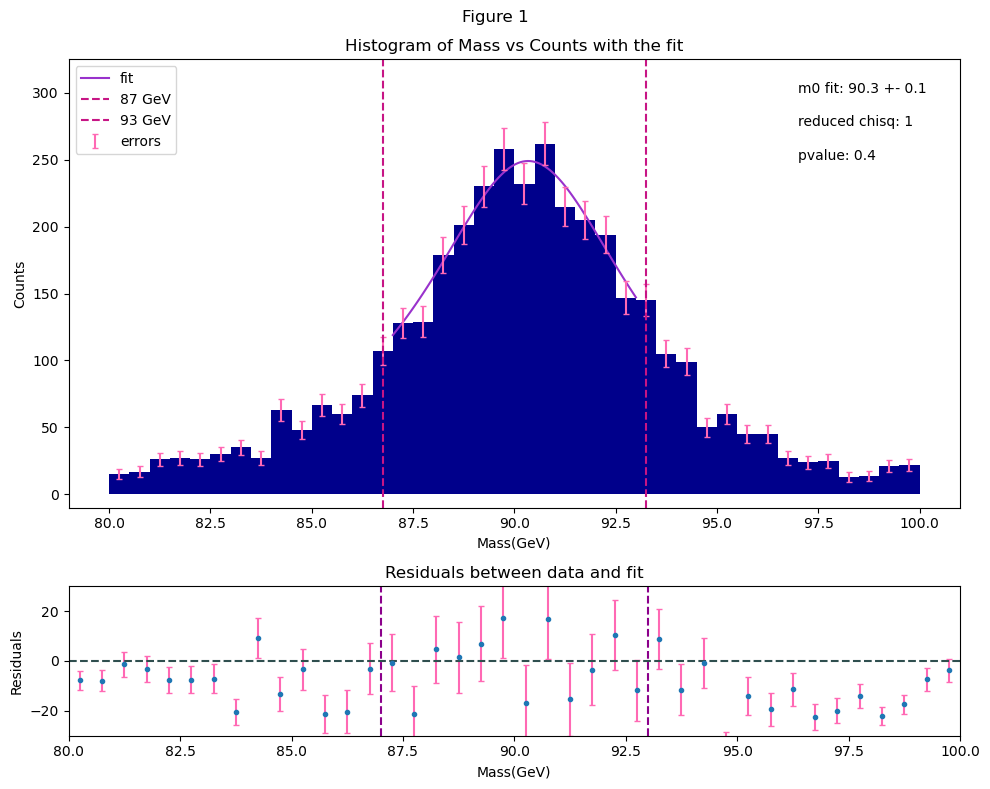

In [5]:
# question 1
def decay_distribution(M, m0, gamma):
    dist = (1/np.pi)*((gamma/2)/(((M-m0)**2)+((gamma/2)**2)))
    return 2500*dist

# question 2
mask = (plot_bins_center>87)&(plot_bins_center<93)

counts_mask = counts[mask]
M_err_mask = sigma_counts[mask]
M_mask = plot_bins_center[mask]

params, covar = curve_fit(f = decay_distribution,
                          xdata = M_mask, 
                          ydata = counts_mask, 
                          sigma = M_err_mask, 
                          absolute_sigma = True)

m0_fit = params[0]
gamma_fit = params[1]
fit_err = np.sqrt(np.diag(covar))

xdummy = np.linspace(87, 93, 100)
ydummy = decay_distribution(xdummy, m0_fit, gamma_fit)

fig, ax = plt.subplots(2, 1, figsize = (10, 8), height_ratios = (3, 1))

# question 3
ax[0].plot(xdummy, ydummy, label = 'fit', color = 'darkorchid')
counts, bins, patches = ax[0].hist(M, bins = bins, color = 'darkblue');
ax[0].errorbar(plot_bins_center, counts, sigma_counts, fmt = ' ', label = 'errors', capsize = 2.5, ecolor = 'hotpink')
ax[0].set_ylim(-10, 325)
ax[0].vlines((xdummy[0]-bin_center), -10, 325, ls = '--', label = "87 GeV", colors = 'mediumvioletred')
ax[0].vlines((xdummy[-1]+bin_center), -10, 325, ls = '--', label = "93 GeV", colors = 'mediumvioletred')
#ax[0].plot(m0_fit, event[1], label = "Predator overtaking Prey", marker = '.', ms = '10', color = 'red')
ax[0].set_xlabel("Mass(GeV)")
ax[0].set_ylabel("Counts")

# question 6
ax[0].text(97, 300, "m0 fit: 90.3 +- 0.1")
ax[0].text(97, 275, "reduced chisq: 1")
ax[0].text(97, 250, "pvalue: 0.4")
# ------------------------

ax[0].set_title("Histogram of Mass vs Counts with the fit")
ax[0].legend()

theory = decay_distribution(plot_bins_center, m0_fit, gamma_fit)
masked_theory = decay_distribution(M_mask, m0_fit, gamma_fit)
new_y = (counts-theory)
new_yerr = sigma_counts

ax[1].errorbar(plot_bins_center, new_y, new_yerr, fmt = '.', capsize = 2.5, ecolor = 'hotpink')
ax[1].set_xlim(80, 100)
ax[1].hlines(0, 80, 100, ls = '--', colors = 'darkslategrey')
ax[1].vlines(87, -30, 30, ls = '--',label = "87 GeV",  colors = 'darkmagenta')
ax[1].vlines(93, -30, 30, ls = '--', label = "93 GeV", colors = 'darkmagenta')
ax[1].set_xlabel("Mass(GeV)")
ax[1].set_ylabel("Residuals")
ax[1].set_ylim(-30, 30)
ax[1].set_title("Residuals between data and fit")
fig.suptitle("Figure 1")
fig.tight_layout()
fig.savefig("Figure 1.png")

In [6]:
# question 4
chisq =  np.sum(((counts_mask-masked_theory)/M_err_mask)**2)
print(f"Chisq: {chisq}")

NDOF = (len(counts_mask))-2
red_chisq = chisq/NDOF
print(f"Reduced Chisq: {red_chisq}")

pvalue = stats.chi2.sf(chisq, NDOF) # 40% chance of that chisquared value or higher, 60% of that or lower
print(f"P-value: {pvalue}")

# question 5/6
print(f"M0 fit value is: {m0_fit} +- {fit_err[0]} GeV")
print(f"Gamma fit value is: {gamma_fit} GeV")
print(NDOF)

Chisq: 9.985097164263774
Reduced Chisq: 0.9985097164263774
P-value: 0.4418017385627231
M0 fit value is: 90.34080586020902 +- 0.09351482703525671 GeV
Gamma fit value is: 6.3909983856627735 GeV
10


# Part 3: 2D Parameter Contours

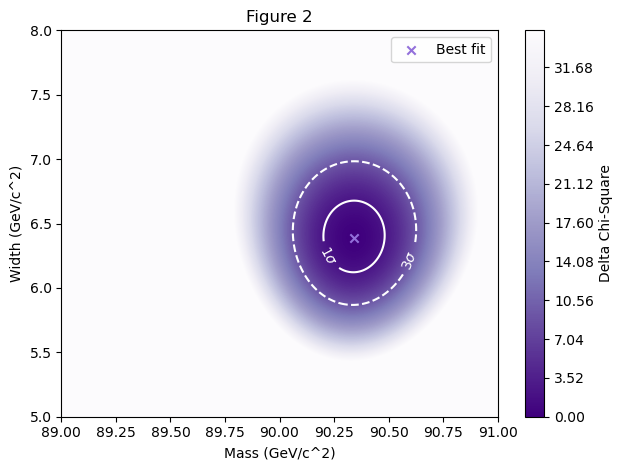

In [7]:
# question 1
n_bins = 300
chi_map = np.zeros((n_bins, n_bins))
m0 = np.linspace(89, 91, n_bins)
gamma = np.linspace(5, 8, n_bins)

# double for loop
for i in range(n_bins):
    for j in range(n_bins):
        theory = decay_distribution(M_mask, m0[i], gamma[j])
        chi2 = np.sum((counts_mask-theory)**2/M_err_mask**2)
        chi_map[j, i] = chi2

chi_min = np.min(chi_map)
chi_map = np.clip(chi_map, chi_min, chi_min+35)
delta_chi_map = chi_map - chi_min

X, Y = np.meshgrid(m0, gamma)

# question 2
fig2, ax2 = plt.subplots(1, 1)
cs = ax2.contourf(X, Y, delta_chi_map, 500, cmap = "Purples_r")
cbar = fig2.colorbar(cs, ax = ax2)

cbar.set_label("Delta Chi-Square")

levels = [2.30, 9.21]

CS = ax2.contour(X, Y, delta_chi_map, levels = levels, colors = ["white", "white"],
                 linestyles = ["solid", "dashed"])

# question 3
fmt = {}
strs = ["1$\\sigma$", "3$\\sigma$"] 
for l, s in zip(CS.levels, strs):
    fmt[l] = s

ax2.clabel(CS, CS.levels, fmt = fmt)

# question 4
ax2.scatter(m0_fit, gamma_fit, marker = 'x', color = 'mediumpurple', label = 'Best fit')
ax2.set_xlabel("Mass (GeV/c^2)")
ax2.set_ylabel("Width (GeV/c^2)")
ax2.set_title("Figure 2")
fig2.tight_layout()
ax2.legend()
fig2.savefig("Figure 2.png")

# PDG accuracy

In [8]:
m0_PDG = 91.1880
m0_err_PDG = 0.0020

m0_diff = np.abs(m0_fit-m0_PDG)
m0_err_diff = fit_err[0]-m0_err_PDG
print(m0_diff, m0_err_diff)

0.8471941397909859 0.09151482703525671
